**Problem- Statement** : Build an efficient Regression Model that should predict the amount of Rainfall, using the dataset Rain in Australia.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Data and Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings("ignore")
path="/content/drive/MyDrive/Project/weatherAUS.csv"
df = pd.read_csv(path)

#Dataset is now stored in a Pandas Dataframe

# **Exploring and Visualizing Data**

In [ ]:
# Shape of the data frame
df.shape

(145460, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.drop("RainTomorrow",axis=1,inplace=True)

In [ ]:
df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 6


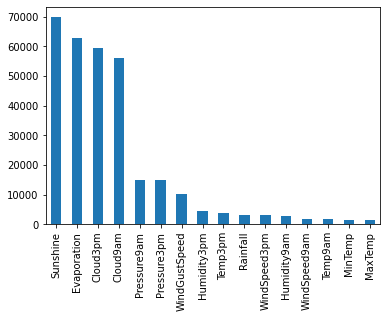

In [ ]:
# gives the number of null values in each column
df.isna().sum()

# visualizing the Null values in Numerical Features:
df[numerical_feature].isnull().sum().sort_values(ascending = False).plot(kind = 'bar')

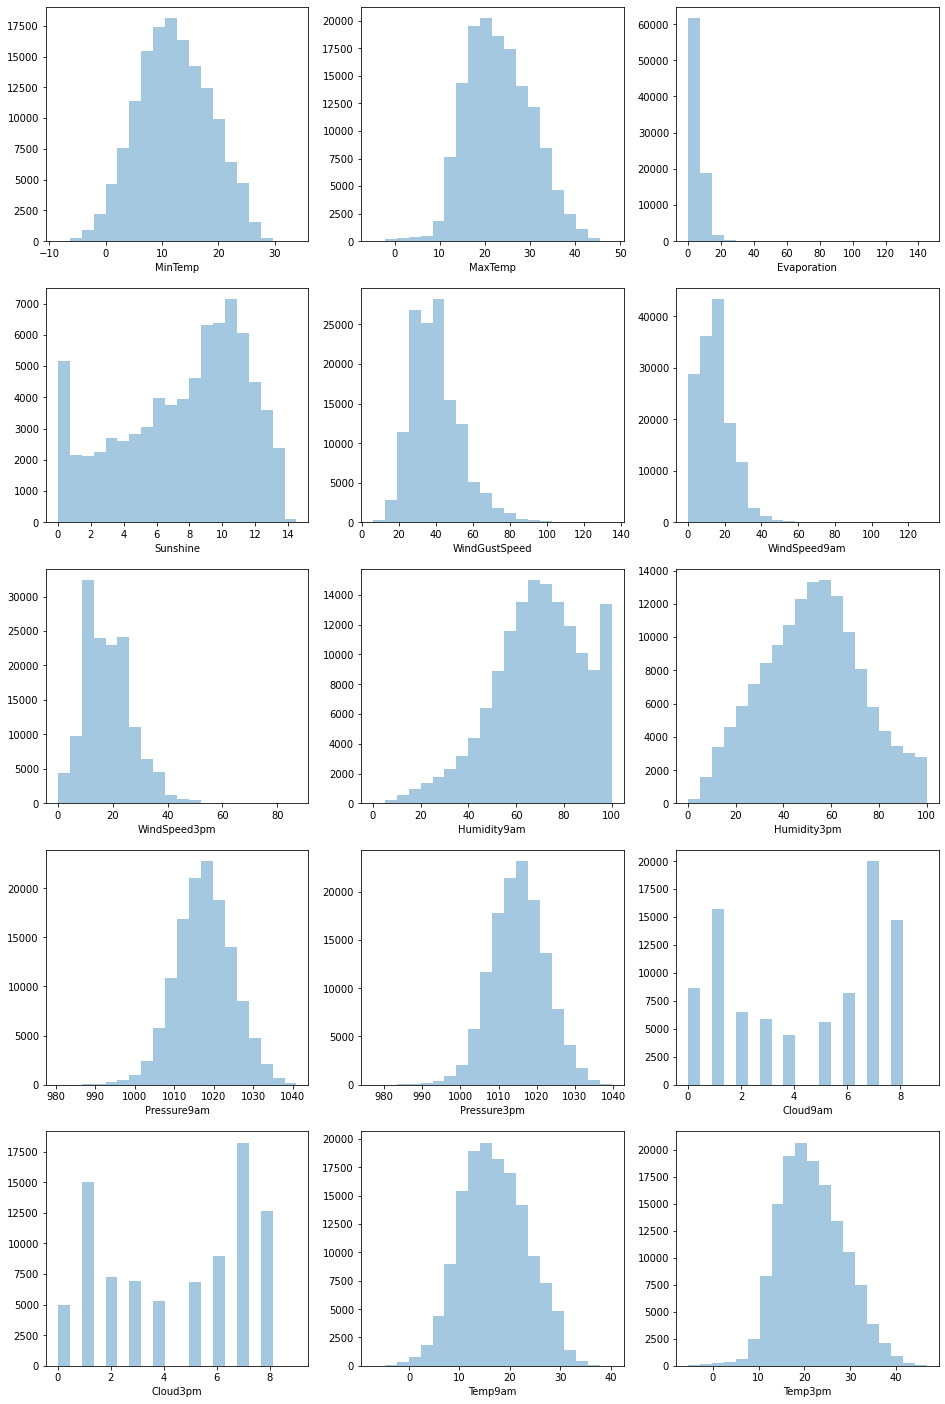

In [ ]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);

# **Handling Outliers**

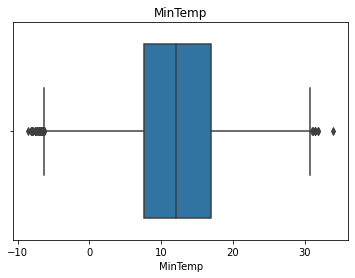

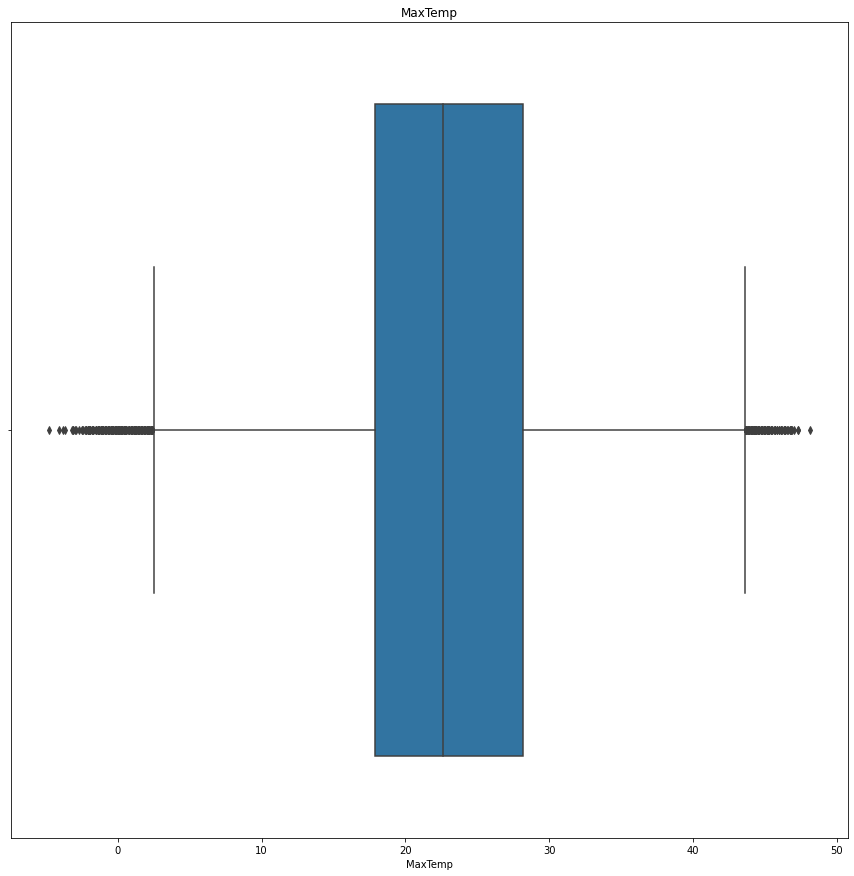

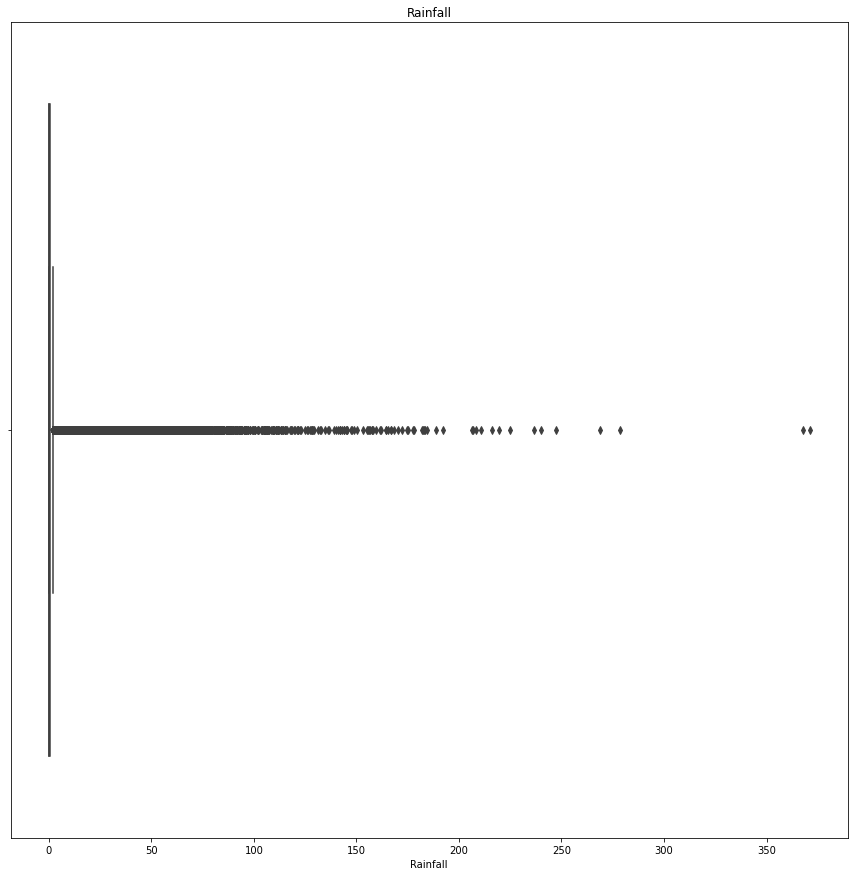

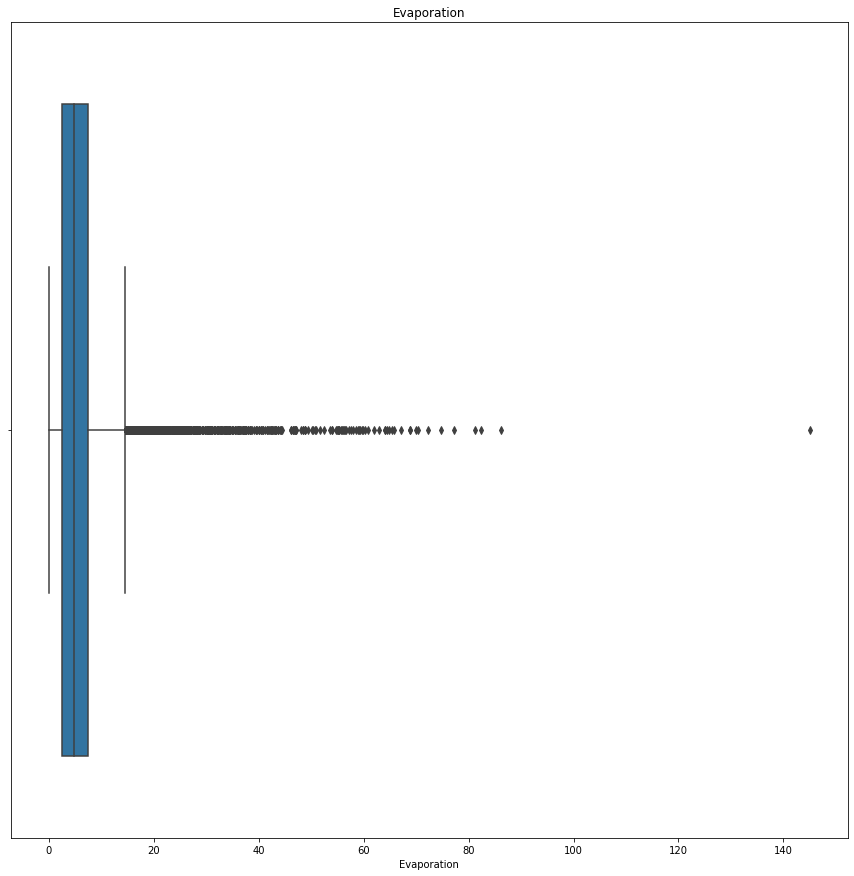

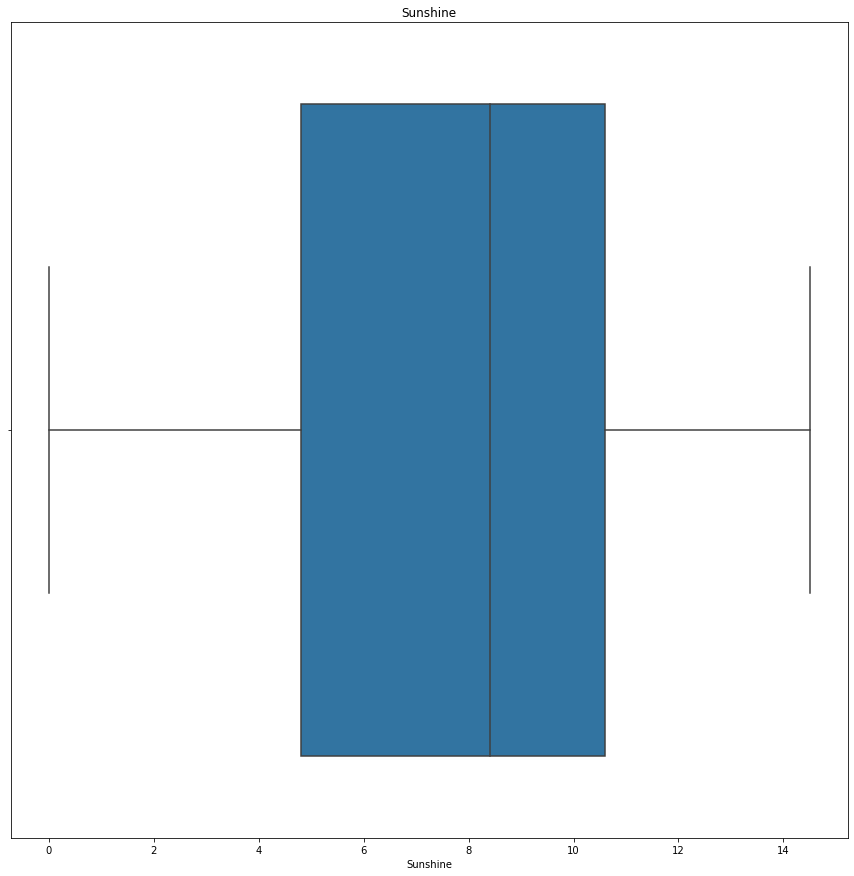

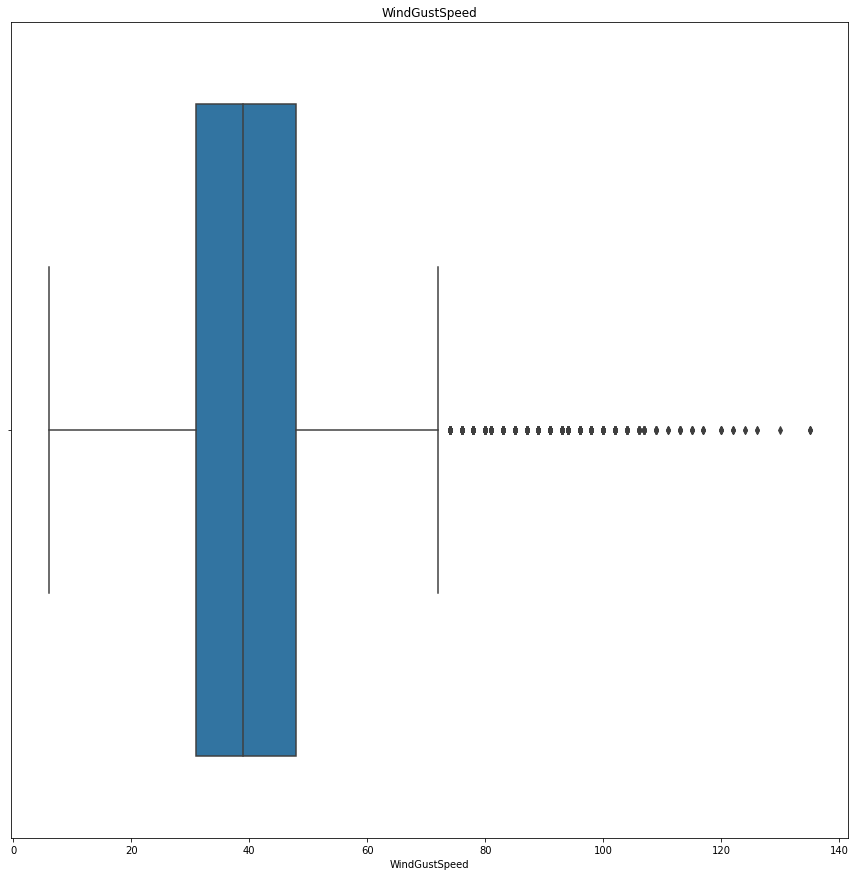

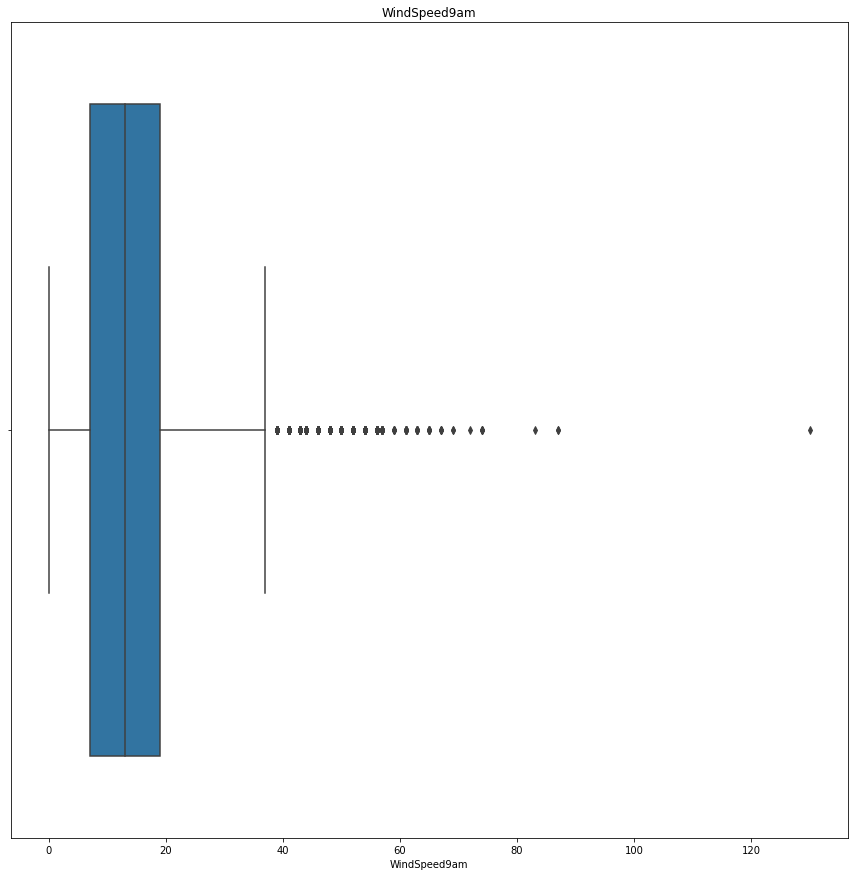

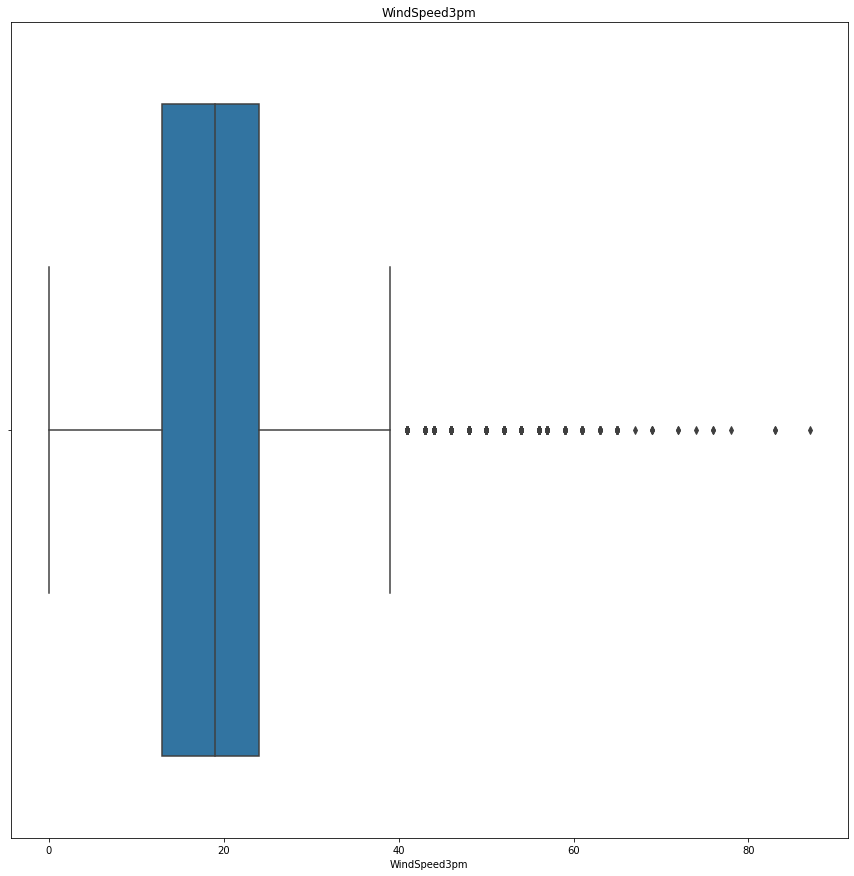

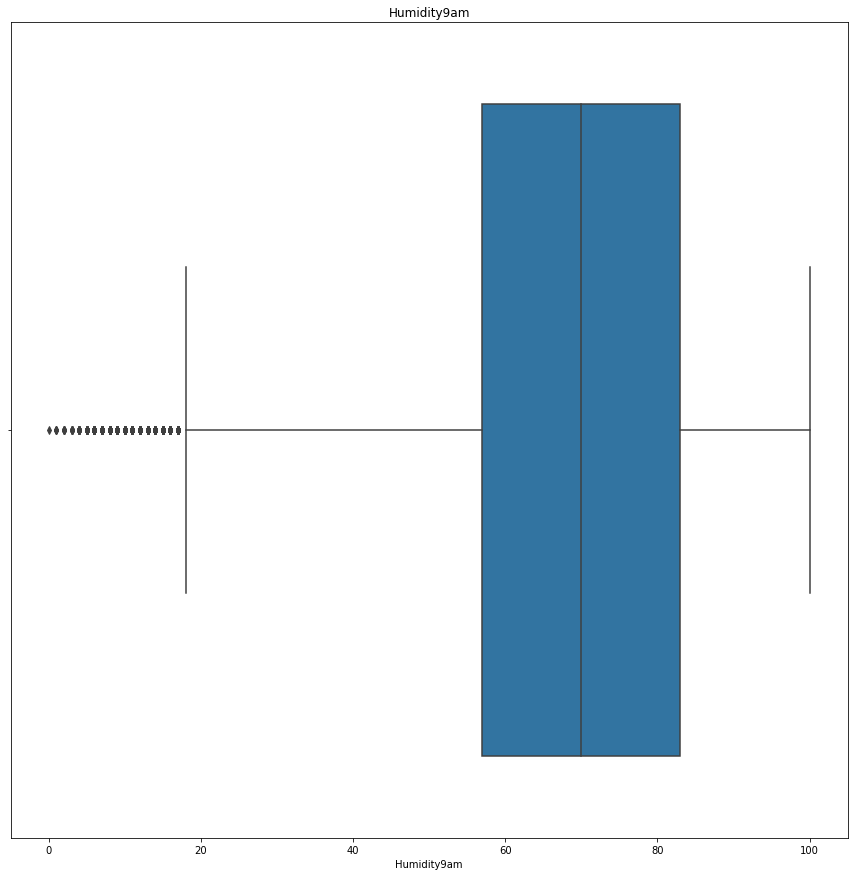

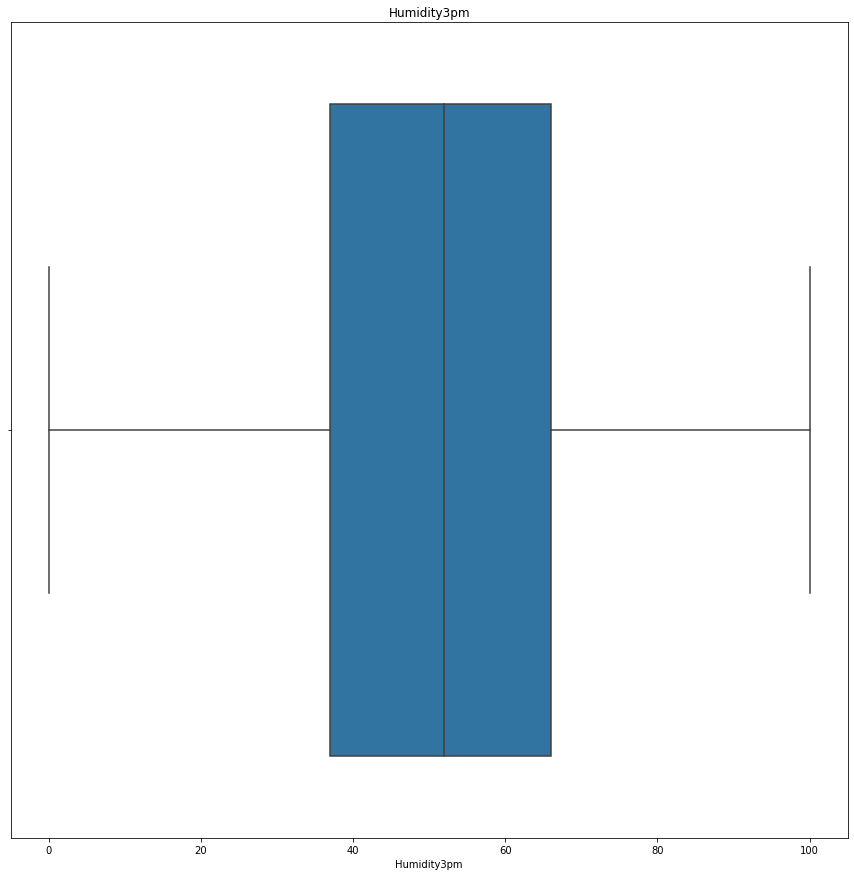

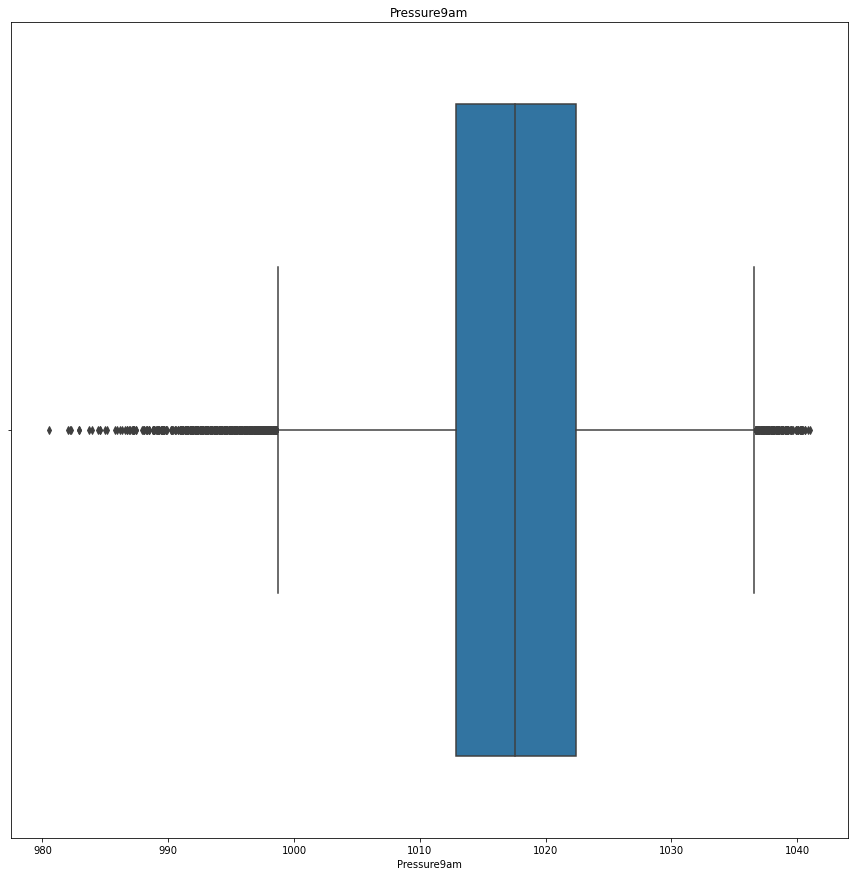

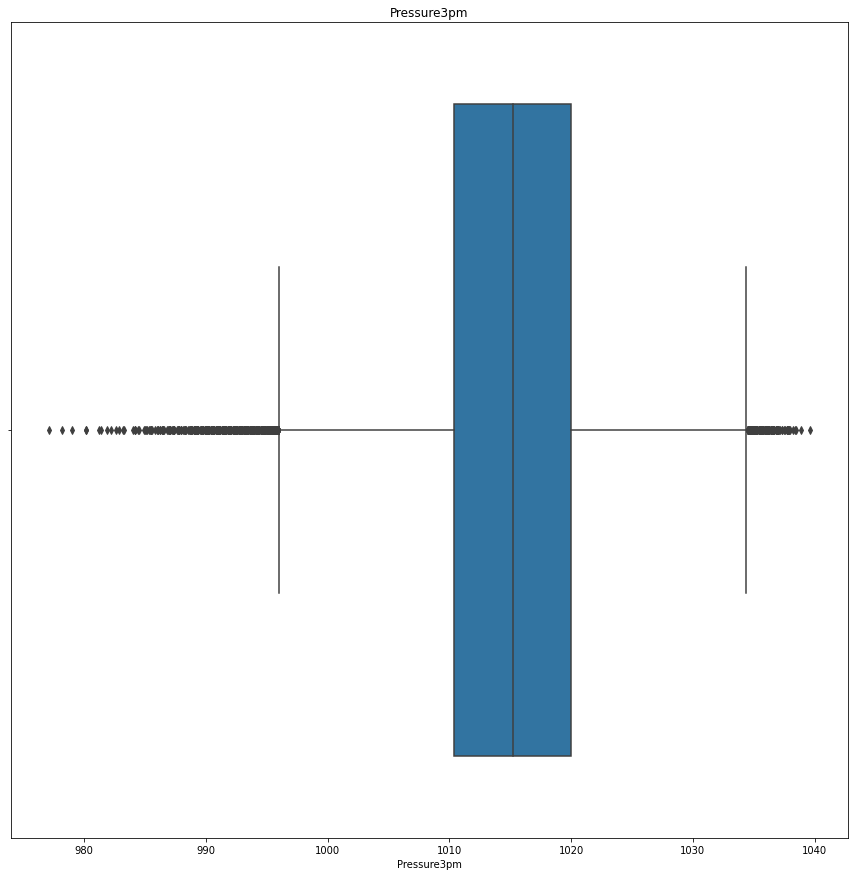

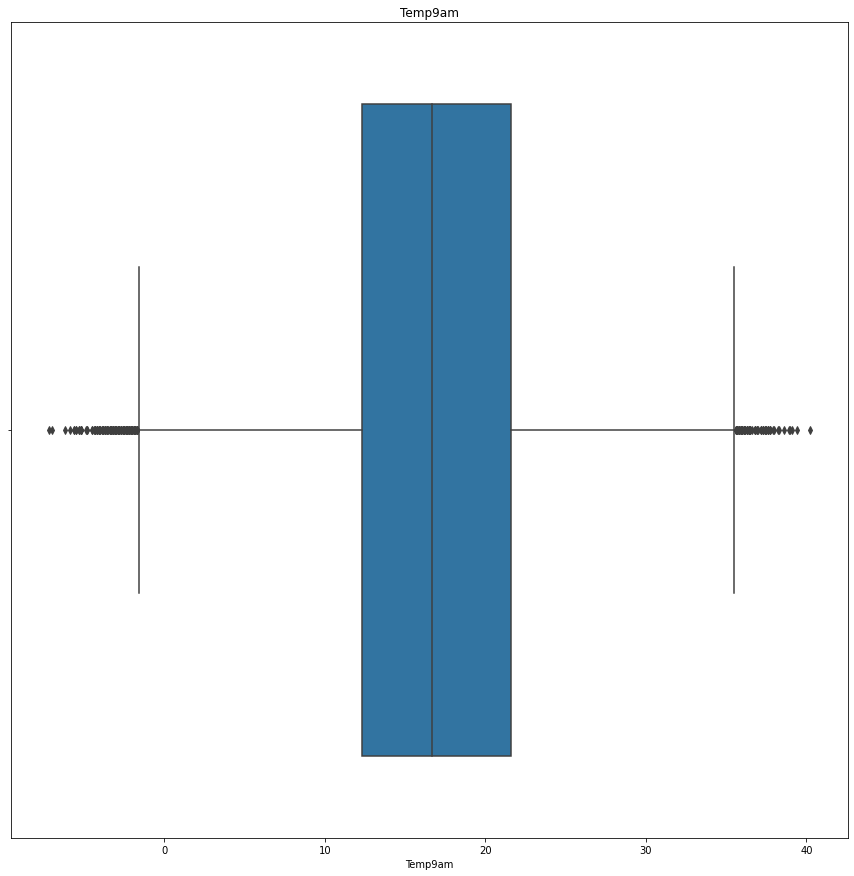

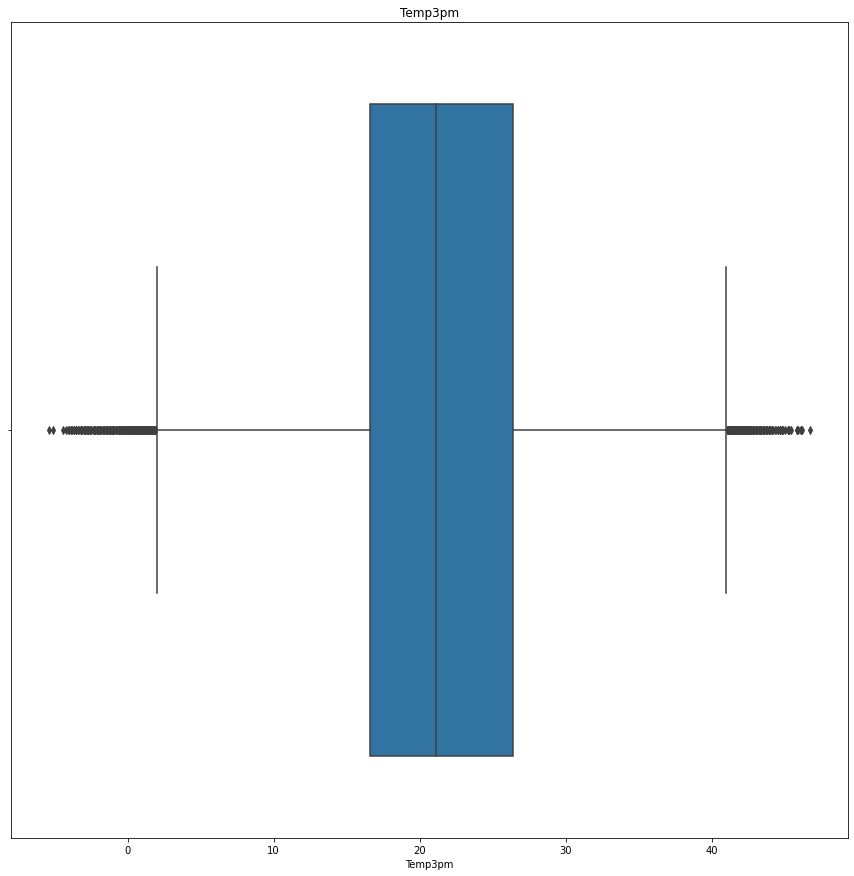

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# **Outlier Treatment to remove outliers from Numerical Features**

In [ ]:
def outliers(df,variable):
  IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
  lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
  upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)


  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  df.loc[df[variable]<=lower_bridge,variable]=lower_bridge

In [ ]:
for feature in continuous_feature:
  outliers(df,str(feature))

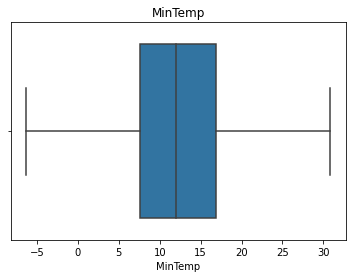

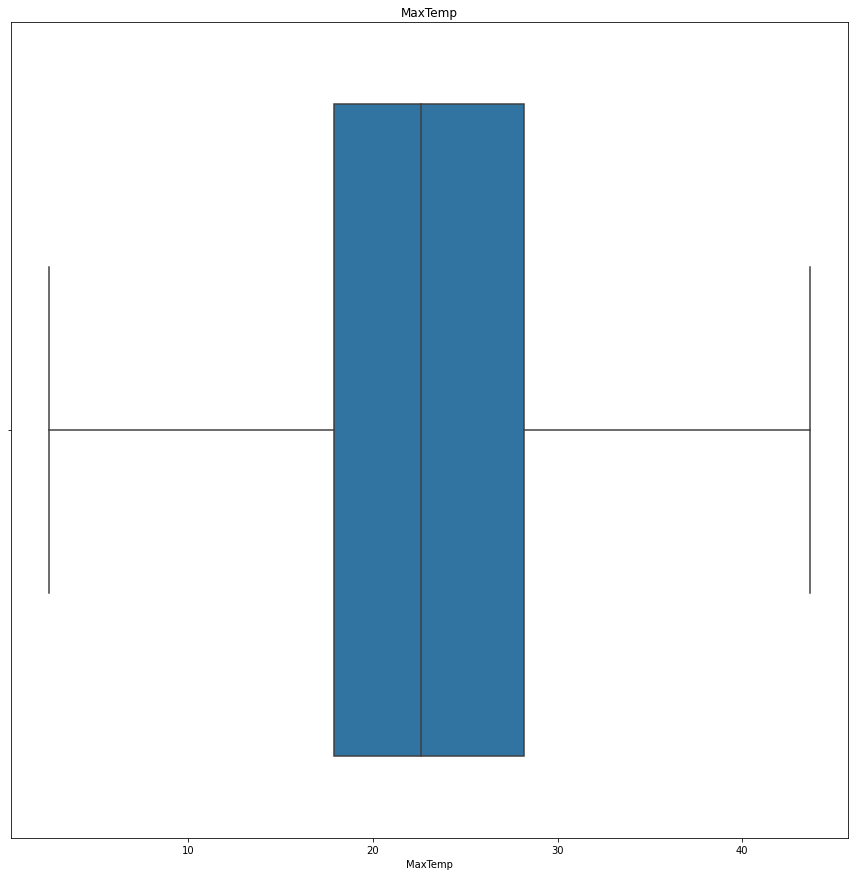

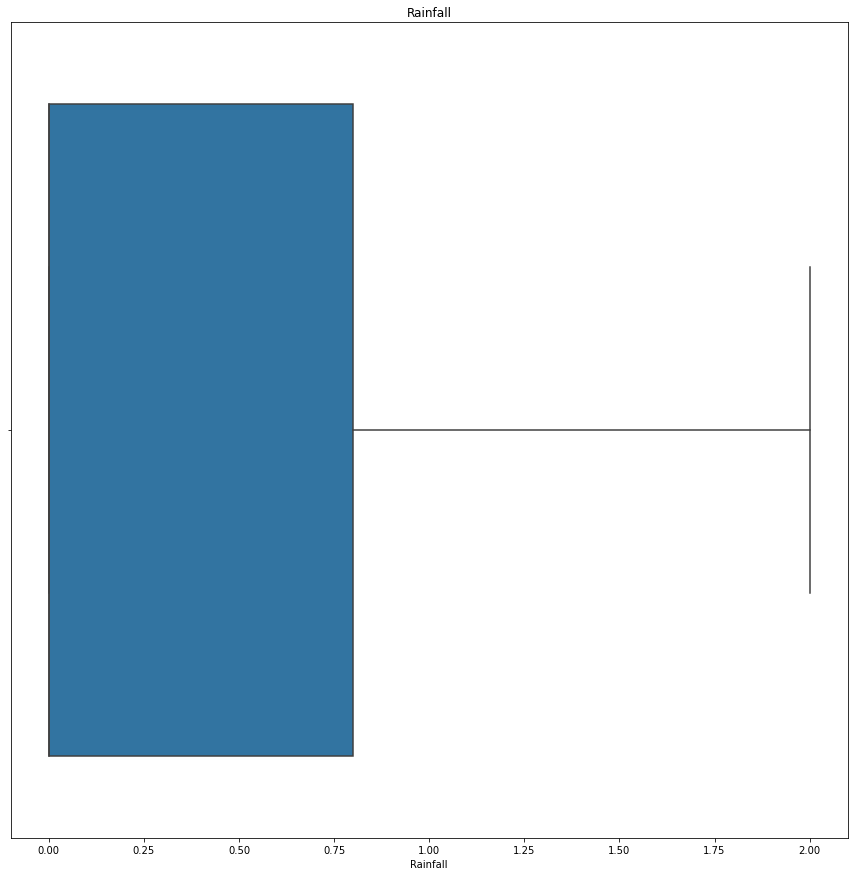

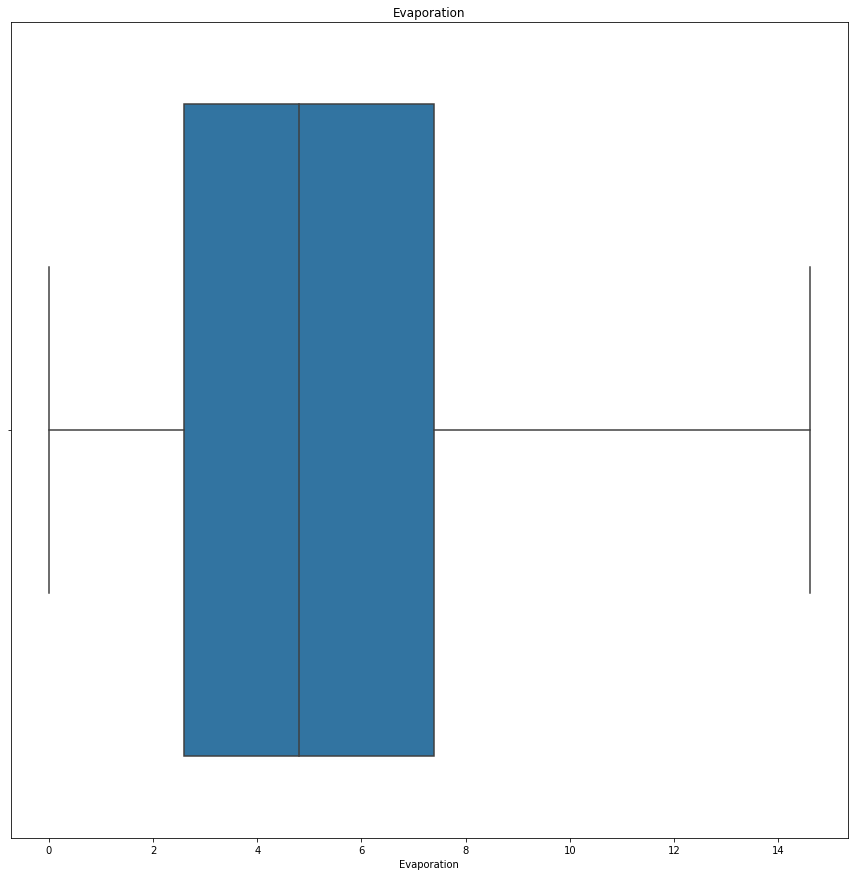

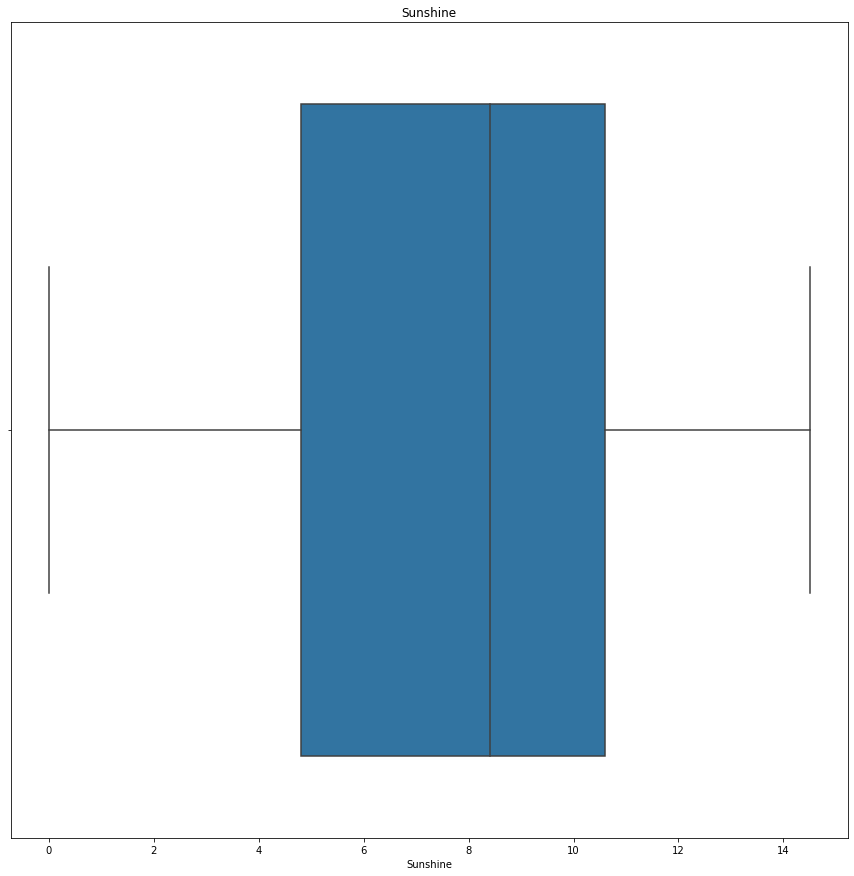

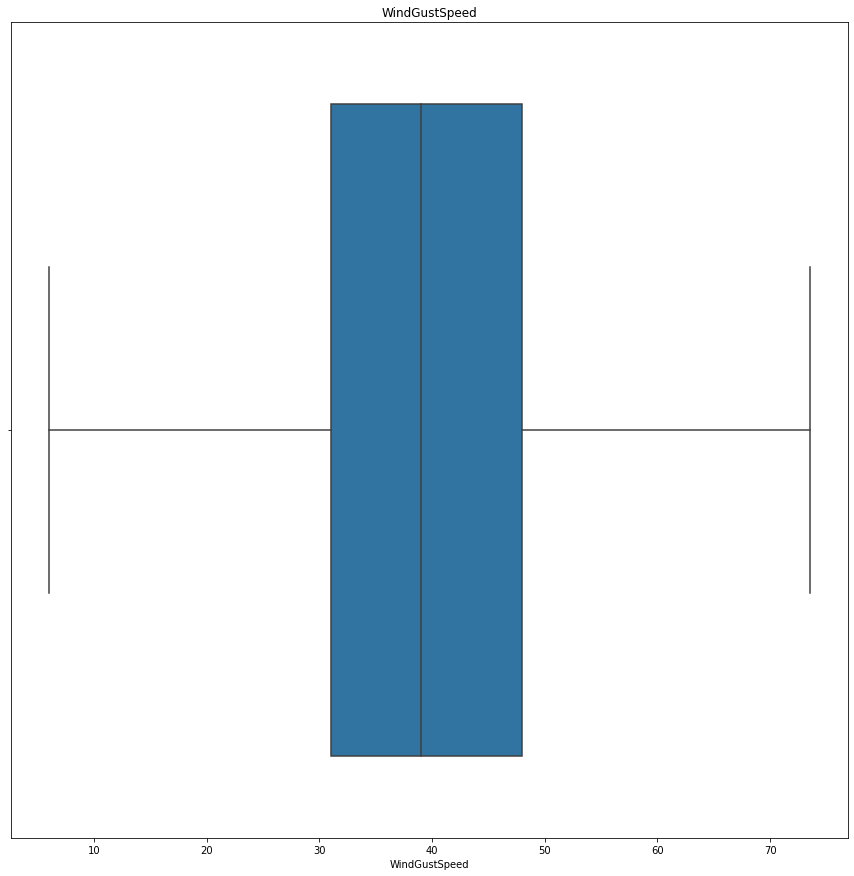

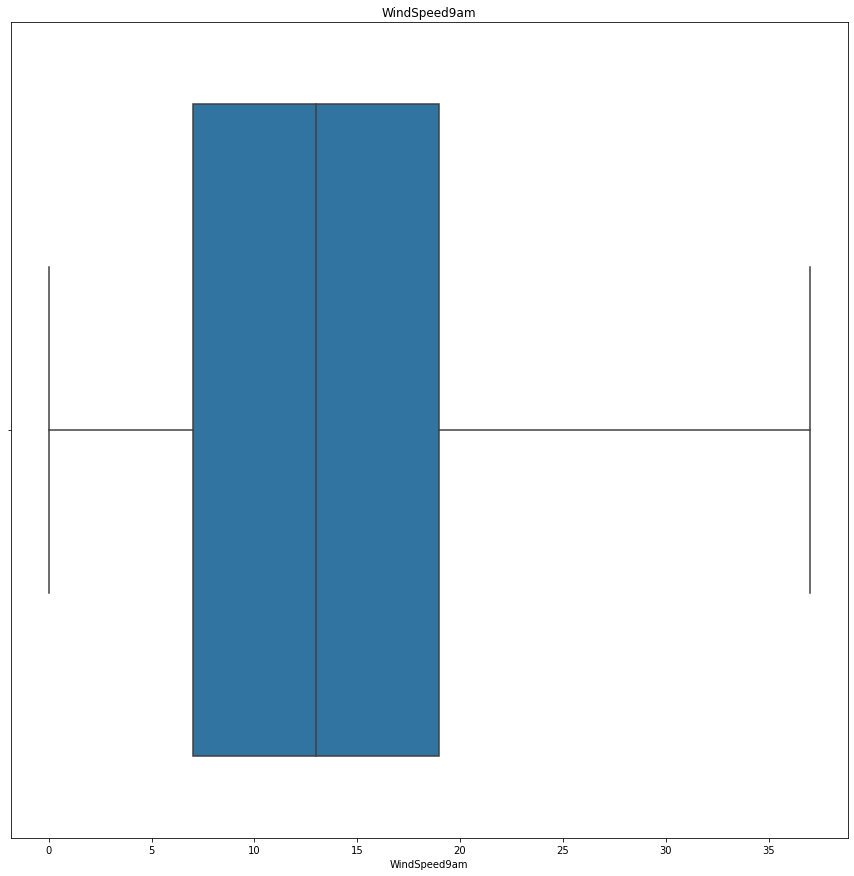

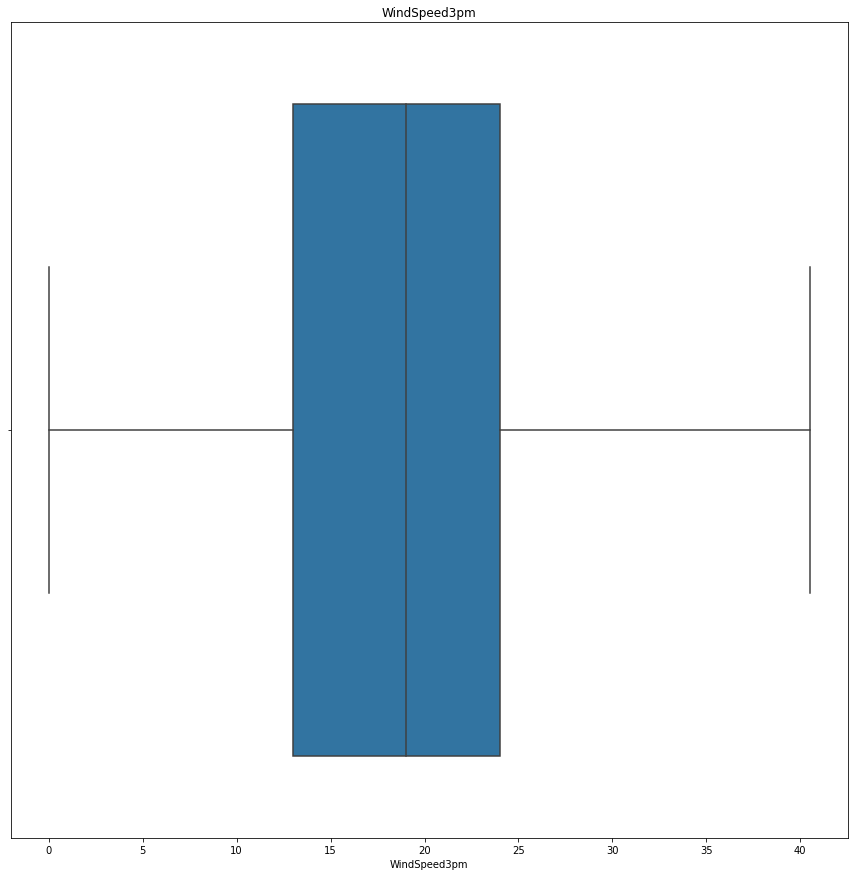

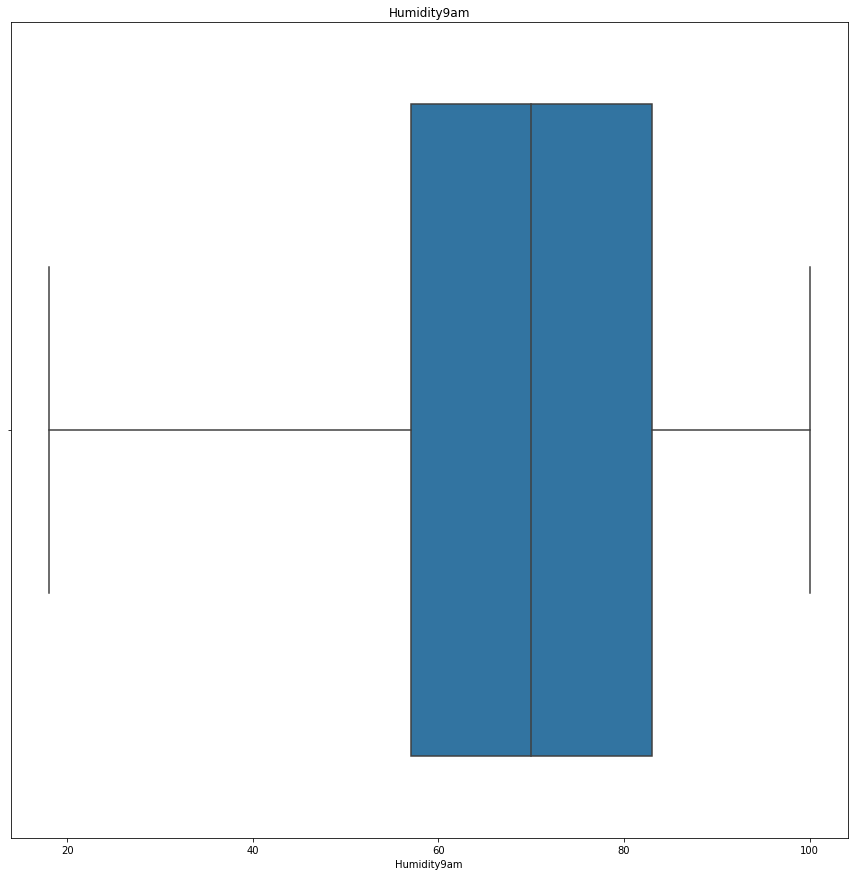

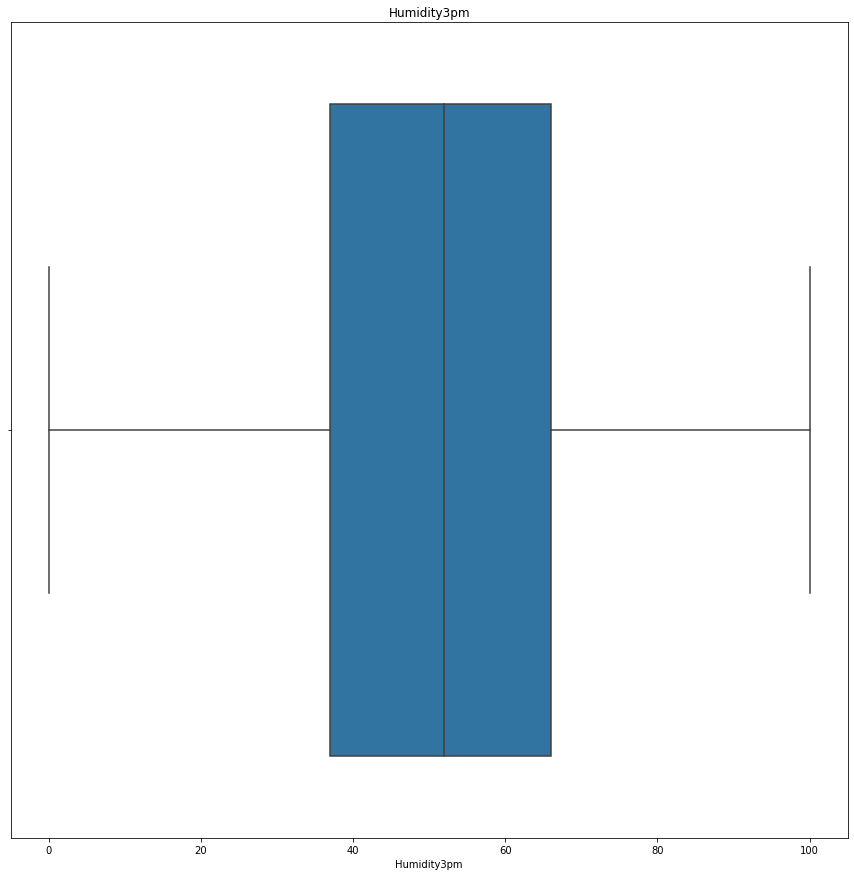

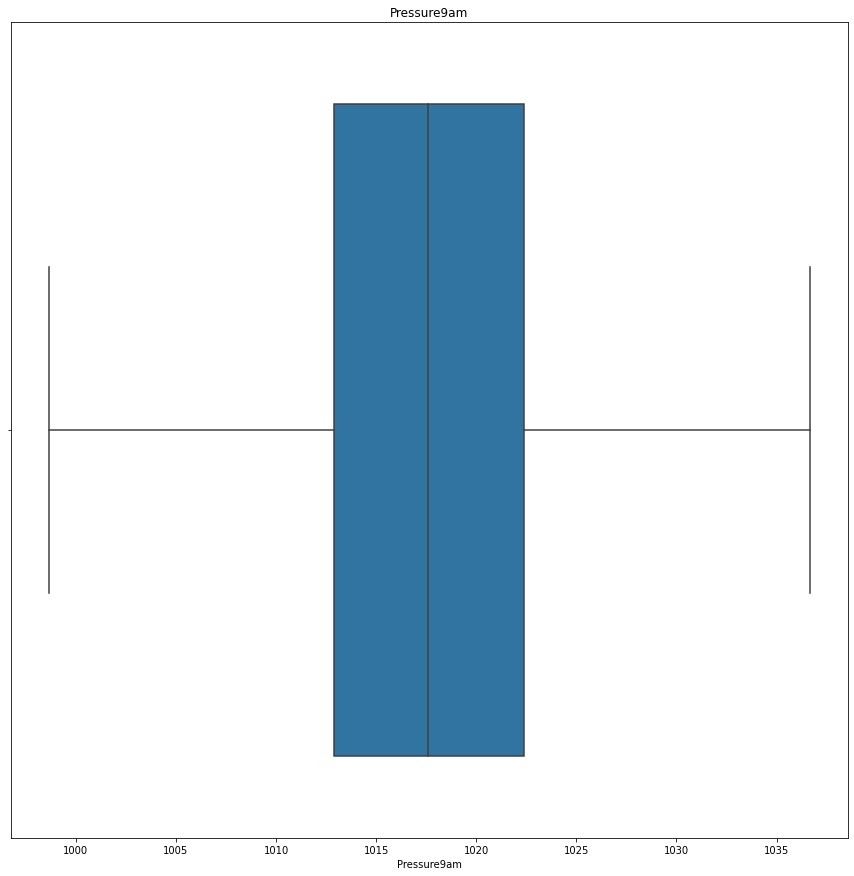

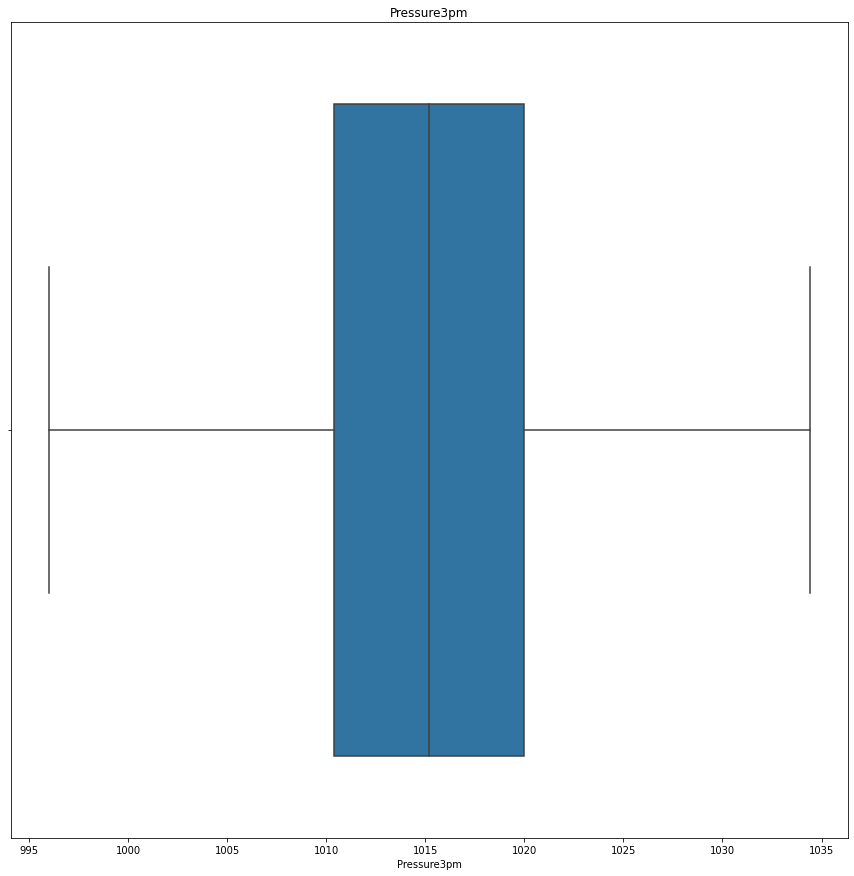

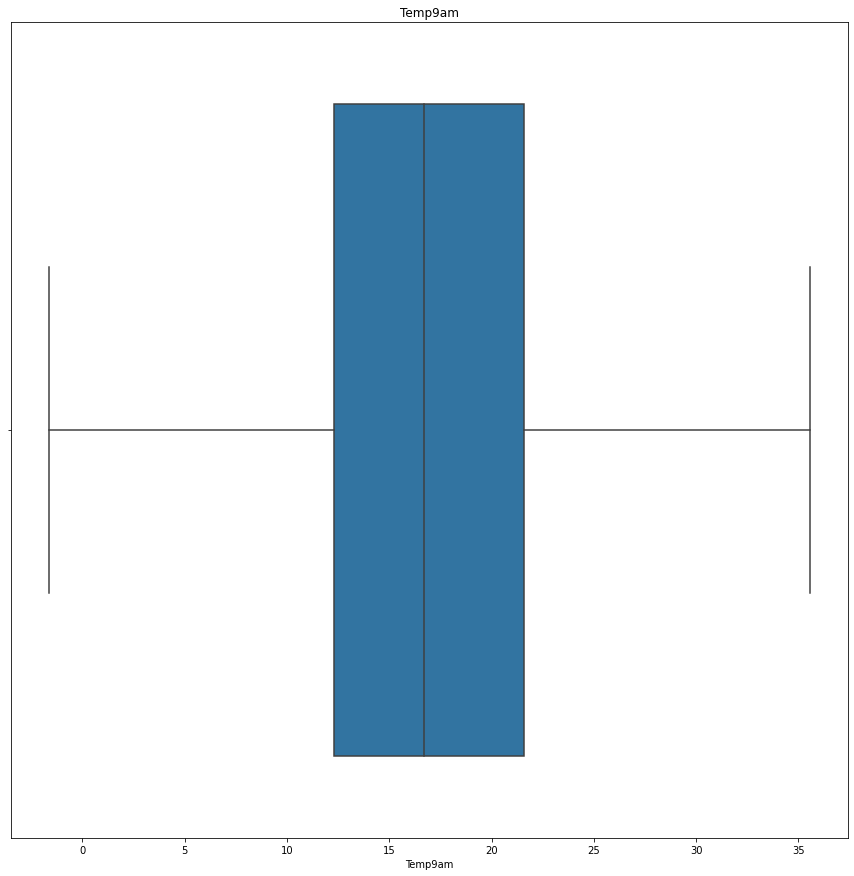

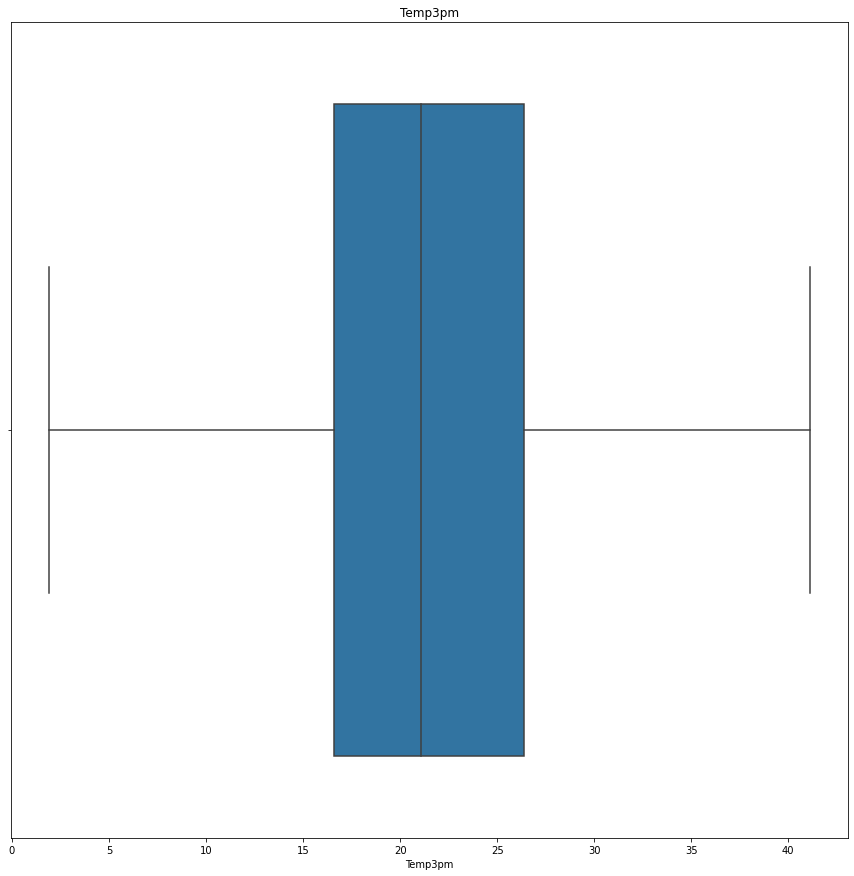

<Figure size 1080x1080 with 0 Axes>

In [ ]:
for feature in continuous_feature:
  data=df.copy()
  sns.boxplot(data[feature])
  plt.title(feature)
  plt.figure(figsize=(15,15))

# **Feature Selection**

- Machine Learning Model performance depends on features that are used to train a model. 
- Feature importance describes which features are relevant to build a model. 
- Feature Importance refers to the techniques that assign a score to input/label features based on how useful they are  at predicting a target variable. Feature importance helps in Feature Selection.

X – Independent Features or Input features

y – Dependent Features or target label

In [ ]:
X = df.iloc[:,[1,2,3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,4].values

In [ ]:
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


In [ ]:
print(Y)

[0.6 0.  0.  ... 0.  0.  0. ]


In [ ]:
Y=Y.reshape(-1,1)

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Filling the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

# **Encoding The Categorical Data**

*Most Machine Learning Algorithms can't handle categorical data. Hence, these categorical data needs to converted to numerical data for modelling, which is called as Feature Encoding.*

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])


#le2 = LabelEncoder()
X[:,3] = le.fit_transform(X[:,3])


#le3 = LabelEncoder()
X[:,5] = le.fit_transform(X[:,5])


#le4 = LabelEncoder()
X[:,6] = le.fit_transform(X[:,6])


#le5 = LabelEncoder()
X[:,-1] = le.fit_transform(X[:,-1])




In [ ]:
X

array([[2, 13.4, 22.9, ..., 16.9, 21.8, 0],
       [2, 7.4, 25.1, ..., 17.2, 24.3, 0],
       [2, 12.9, 25.7, ..., 21.0, 23.2, 0],
       ...,
       [41, 5.4, 26.9, ..., 12.5, 26.1, 0],
       [41, 7.8, 27.0, ..., 15.1, 26.0, 0],
       [41, 14.9, 20.0, ..., 15.0, 20.9, 0]], dtype=object)

In [ ]:
Y

array([[0.6],
       [0. ],
       [0. ],
       ...,
       [0. ],
       [0. ],
       [0. ]])

# **Feature Scaling**

*Feature Scaling is a technique used to scale, normalize, standardize data in range(0,1). When each column of a dataset has distinct values, then it helps to scale data of each column to a common level. StandardScaler is a class used to implement feature scaling.*

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# **Splitting Dataset into Training set and Testing set**
Dividing the Training-Testing Data as 80:20

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


In [ ]:
Y_test.shape

(29092, 1)

# **Applying Models**

# **CatBoost**

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
cat = CatBoostRegressor(random_state=0)
cat.fit(X_train, Y_train)

     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Learning rate set to 0.086812
0:	learn: 0.7239178	total: 72ms	remaining: 1m 11s
1:	learn: 0.6661637	total: 90.6ms	remaining: 45.2s
2:	learn: 0.6137773	total: 112ms	remaining: 37.2s
3:	learn: 0.5663355	total: 131ms	remaining: 32.6s
4:	learn: 0.5233997	total: 152ms	remaining: 30.2s
5:	learn: 0.4848030	total: 163ms	remaining: 27s
6:	learn: 0.4500867	total: 184ms	remaining: 26.2s
7:	learn: 0.4187982	total: 205ms	remaining: 25.4s
8:	learn: 0.3909031	total: 219ms	remaining: 24.2s
9:	learn: 0.3658510	total: 241ms	remaining: 23.8s
10:	learn: 0.3436959	total: 254ms	remaining: 22.8s
11:	learn: 0.3238994	total: 279ms	remaining: 23s
12:	learn: 0.3063031	total: 302ms	remaining: 22.9s
13:	learn: 0.2908889	total: 321ms	remaining: 22.6s
14:	learn: 0.2772784	total: 342ms	remaining: 22.4s
15:	learn: 0.2653935	total: 362ms	remaining: 22.3s
16:	learn: 0.2549671	total: 383ms	remaining: 22.2s
17:	learn: 0.2458884	total: 407ms	remaining: 22.2s
18:	lea

In [ ]:
y_pred=cat.predict(X_test)

In [ ]:
y_pred.shape

(29092,)

In [ ]:
y_pred=y_pred.reshape(29092,1)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print(r2)

0.9436401902196964


In [ ]:
RMSE_cat=np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', RMSE_cat)

Root Mean Squared Error: 0.18641252747005507


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X_train,Y_train)
y_pred1 = rf.predict(X_test)

In [ ]:
y_pred1.shape

(29092,)

In [ ]:
y_pred1 = y_pred1.reshape((29092, 1))

In [ ]:
r2 = r2_score(Y_test, y_pred1)
print(r2)

0.941223220812546


In [ ]:
RMSE_rf=np.sqrt(metrics.mean_squared_error(Y_test, y_pred1))
print('Root Mean Squared Error:', RMSE_rf)

Root Mean Squared Error: 0.1903676845678189


# **XGBoost**

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
y_pred3 = xgb.predict(X_test)

[04:09:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred3.shape

(29092,)

In [ ]:
y_pred3.shape

(29092,)

In [ ]:
y_pred3=y_pred3.reshape((29092,1))

In [ ]:
r2 = r2_score(Y_test, y_pred3)
print(r2)

0.9421680093316921


In [ ]:
RMSE_xgb=np.sqrt(metrics.mean_squared_error(Y_test, y_pred3))
print('Root Mean Squared Error:', RMSE_xgb)

Root Mean Squared Error: 0.18883148406914452


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
y_pred4=dt.predict(X_test)

In [ ]:
y_pred4=y_pred4.reshape((29092,1))


In [ ]:
r2 = r2_score(Y_test, y_pred4)
print(r2)

0.8752574204910077


In [ ]:
RMSE_dt=np.sqrt(metrics.mean_squared_error(Y_test, y_pred4))
print('Root Mean Squared Error:', RMSE_dt)

Root Mean Squared Error: 0.27733053902300053


# Evaluation

We have taken four different regression models and have found their corresponding RMSE values:

----RMSE of CatBoost: 0.186

----RMSE of Random Forest: 0.190 

----RMSE of XGBoost: 0.1888

----RMSE of DecisionTree: 0.278

**CatBoost has the lowest RMSE, which tells us that it’s able to fit the dataset the best out of the four potential models.**








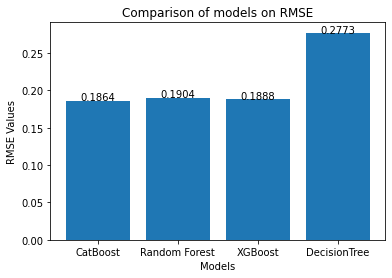

In [ ]:
x=['CatBoost','Random Forest','XGBoost','DecisionTree']
y=[RMSE_cat,RMSE_rf,RMSE_xgb,RMSE_dt]
plt.bar(x,y)
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title('Comparison of models on RMSE')


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,    y[i],"{:.4f}".format(y[i]), ha = 'center')
addlabels(x,y)
plt.show()

# Hyper Parameter tuning for CatBoost

In [ ]:
parameters={'iterations':5000,
        'learning_rate':0.01,
        'depth':10,
        'loss_function':'RMSE',
        'eval_metric':'RMSE',
        'l2_leaf_reg': 0.3,
        'random_seed':55,
        'metric_period':50, #calculate metrics once per 50 iterations
        'od_type':"Iter",   #overfit detector
        'od_wait':20,       #most recent best iteration to wait before stopping
        'verbose':True,
        'use_best_model':True}
cat_tuned= CatBoostRegressor(**parameters)
cat_tuned.fit(X_train, Y_train,eval_set=(X_test,Y_test),use_best_model=True,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7802980	test: 0.7779055	best: 0.7779055 (0)	total: 233ms	remaining: 19m 25s
50:	learn: 0.4976049	test: 0.4962063	best: 0.4962063 (50)	total: 7.32s	remaining: 11m 50s
100:	learn: 0.3387410	test: 0.3377672	best: 0.3377672 (100)	total: 14.1s	remaining: 11m 23s
150:	learn: 0.2561635	test: 0.2553461	best: 0.2553461 (150)	total: 20.3s	remaining: 10m 52s
200:	learn: 0.2174235	test: 0.2167610	best: 0.2167610 (200)	total: 23.8s	remaining: 9m 27s
250:	learn: 0.2006599	test: 0.2002397	best: 0.2002397 (250)	total: 26.8s	remaining: 8m 27s
300:	learn: 0.1934453	test: 0.1934089	best: 0.1934089 (300)	total: 30.2s	remaining: 7m 51s
350:	learn: 0.1901712	test: 0.1905612	best: 0.1905612 (350)	total: 33.5s	remaining: 7m 23s
400:	learn: 0.1883590	test: 0.1892614	best: 0.1892614 (400)	total: 36.8s	remaining: 7m 1s
450:	learn: 0.1871046	test: 0.1886019	best: 0.1886019 (450)	total: 40s	remaining: 6m 43s
500:	learn: 0.1861339	test: 0.1881992	best: 0.1881992 (500)	total: 43.4s	remaining: 6m 29s
550:

In [ ]:
y_pred9=cat_tuned.predict(X_test)
y_pred9=y_pred9.reshape(29092,1)
RMSE_cat_tuned=np.sqrt(metrics.mean_squared_error(Y_test, y_pred9))
print('Root Mean Squared Error:', RMSE_cat_tuned)

Root Mean Squared Error: 0.1861535336740465


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred9)
print(r2)

0.9437966893686965


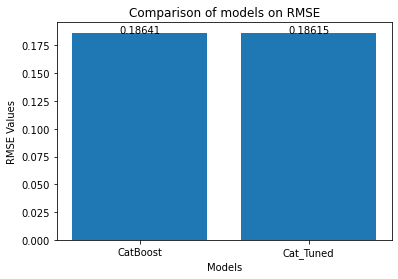

In [ ]:
x=['CatBoost','Cat_Tuned']
y=[RMSE_cat,RMSE_cat_tuned]
plt.bar(x,y)
plt.xlabel('Models')
plt.ylabel('RMSE Values')
plt.title('Comparison of models on RMSE')


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,    y[i],"{:.5f}".format(y[i]), ha = 'center')
addlabels(x,y)
plt.show()

#Saving Model

In [ ]:
import pickle
with open('Rainfall_pkl', 'wb') as files:
    pickle.dump(cat_tuned, files)

In [ ]:
'''with open('Rainfall_pkl' , 'rb') as f:
    lr = pickle.load(f)'''

"with open('Rainfall_pkl' , 'rb') as f:\n    lr = pickle.load(f)"